In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import keras
import matplotlib.pyplot as plt

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_nn import *
from ipynb.fs.full.myfun_model_nn import *
from ipynb.fs.full.myfun_model_linlog import *

2024-02-16 13:13:22.326275: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 13:13:22.326302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 13:13:22.327139: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 13:13:22.333093: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 13:13:23.137756: W tensorflow/compiler/tf2

## Using Traffic dynamic with Lin/Log velocity

In [2]:
## Params
Nx = 100
Nt = 160
T = 0.5
trange = 0, 0.245, T
v0 = 30

x_flag = 0

## Vehicle distribution at $t=0$

In [3]:
# Time
tspan = np.linspace(0,T,Nt)
tspan_rounded = list(np.round(tspan,3))
idx = [tspan_rounded.index(t) for t in trange]

In [4]:
# Space
dx = 1/int(Nx/3)

## Linearly distributed
if x_flag == 0:
    a = np.linspace(-1,0,int(Nx/3))
    b = np.linspace(0+dx/2, 1, Nx-int(Nx/3))
    X = np.concatenate([a, b])
    
## Random uniformly distributed
if x_flag == 1:
    rng = np.random.default_rng(12)
    a = rng.uniform(-1, 0, int(Nx/3))
    b = rng.uniform(0+dx/2, 1, Nx-int(Nx/3))
    my_rnd = np.concatenate([a, b])
    # Check if sorted
    if all(my_rnd[i] <= my_rnd[i+1] for i in range(len(my_rnd) - 1)):
        print("All the vehicles are sorted")
        X = m_rnd
    else:
        print("There's at least a vehicle not sorted")
        X = my_rnd.copy()
        X.sort()

# c = np.linspace(1,2,10)
# xspan = np.concatenate([X,c])
xspan = X

In [5]:
cons_dis = np.diff(xspan, axis=0)
L = np.mean(cons_dis)

In [6]:
L

0.020202020202020204

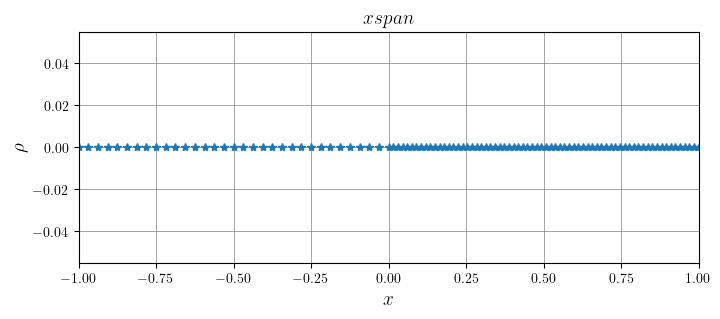

In [7]:
# Initialize the fig
nrow, ncol = 1, 1
width, height = 8, 3 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width,height))

ax.plot(xspan,xspan*0,marker='*', ls='None')

ax.set_xlim([-1,1])

# labeling     
ax.set_xlabel(r"$x$",fontsize=14)
ax.set_ylabel(r"$\rho$",fontsize=14)
ax.set_title(fr"$xspan$",fontsize=14)

ax.grid(color='grey', linestyle='-', linewidth=0.5)
    
plt.show()

### Lin

In [8]:
# Solve the ODE system in this time interval
sol = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L, 'Lin'), tfirst = True).T

In [9]:
len(tspan)

160

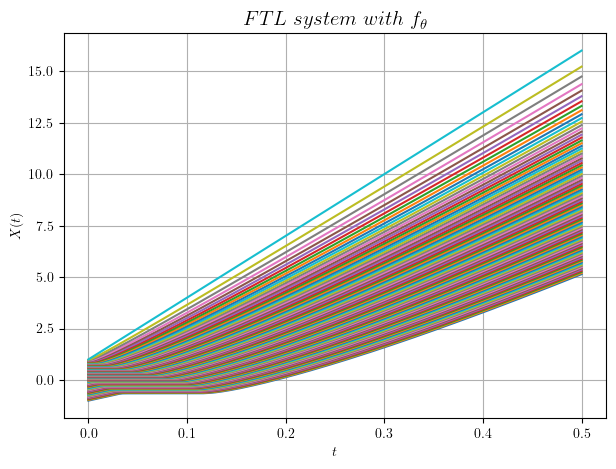

In [10]:
# Create a figure and axis for the plot
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width, height))

# Plot the true and simulated trajectories for each vehicle
for veh in range(0, Nx):
    ax.plot(tspan, sol[veh])

ax.set_xlabel("$t$")
ax.set_ylabel("$X(t)$")
ax.set_title(fr"$FTL\ system\ with\ f_\theta$", fontsize=15)

plt.grid()
plt.show()

In [11]:
# Discretized density

ln = 1/Nx
pn = ln/np.diff(sol, axis=0)
# pn = pn/np.max(pn)
idx = 0, list(tspan_rounded).index(0.245), -1

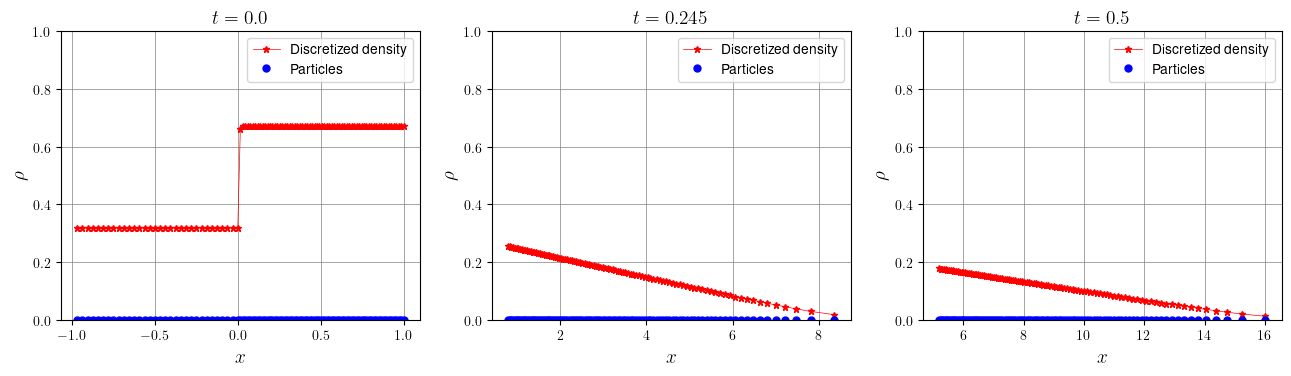

In [12]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for ax, i in zip(axes.ravel(), idx):

    t = tspan[i]
    x = sol[:,i][1:]
    ax.plot(x,pn[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#     ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])

    # labeling     
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(r"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t.round(3)}$",fontsize=14)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()
    
plt.show()

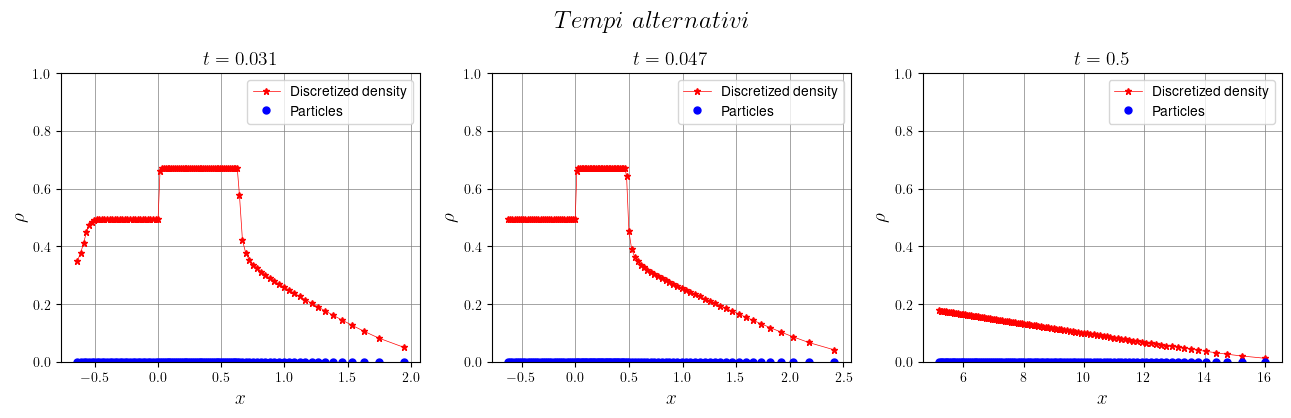

In [13]:
## Tempi alternativi
idx = 10, 15, -1

# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for ax, i in zip(axes.ravel(), idx):

    t = tspan[i]
    x = sol[:,i][1:]
    ax.plot(x,pn[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#     ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])

    # labeling     
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(r"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t.round(3)}$",fontsize=14)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()
    
plt.suptitle(fr"$Tempi\ alternativi$", fontsize=18, y=1.05);
plt.show()

### Log

In [14]:
# Solve the ODE system in this time interval
sol = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L, 'Log'), tfirst = True).T

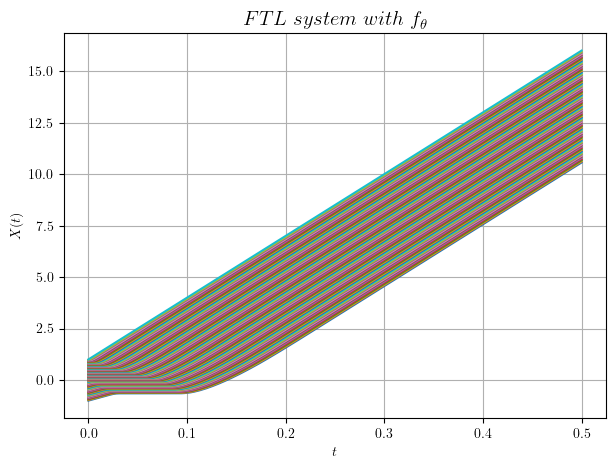

In [15]:
# Create a figure and axis for the plot
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width, height))

# Plot the true and simulated trajectories for each vehicle
for veh in range(0, Nx):
    ax.plot(tspan, sol[veh])

ax.set_xlabel("$t$")
ax.set_ylabel("$X(t)$")
ax.set_title(fr"$FTL\ system\ with\ f_\theta$", fontsize=15)

plt.grid()
plt.show()

In [16]:
# Discretized density

ln = 1/Nx
pn = ln/np.diff(sol, axis=0)
idx = 0, list(tspan_rounded).index(0.245), -1

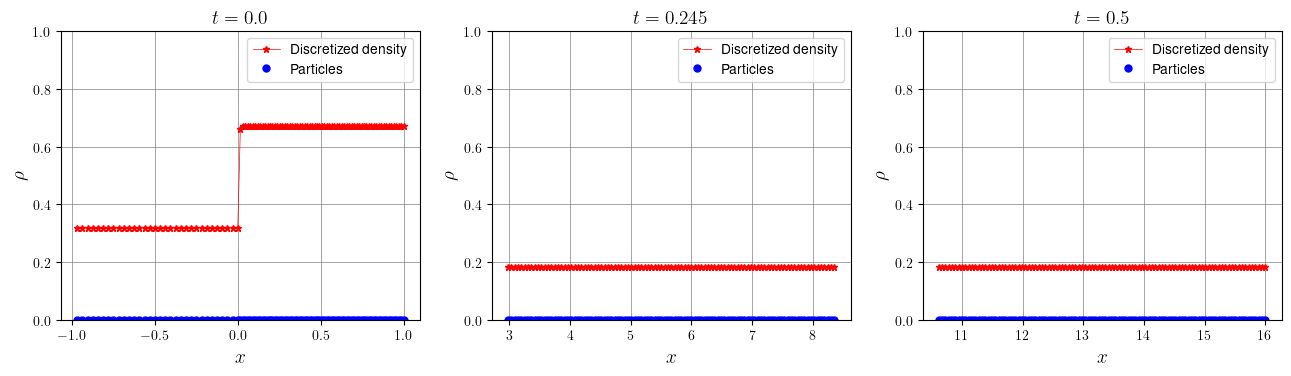

In [17]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for ax, i in zip(axes.ravel(), idx):

    t = tspan[i]
    x = sol[:,i][1:]
    ax.plot(x,pn[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#     ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])

    # labeling     
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(r"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t.round(3)}$",fontsize=14)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()
    
plt.show()

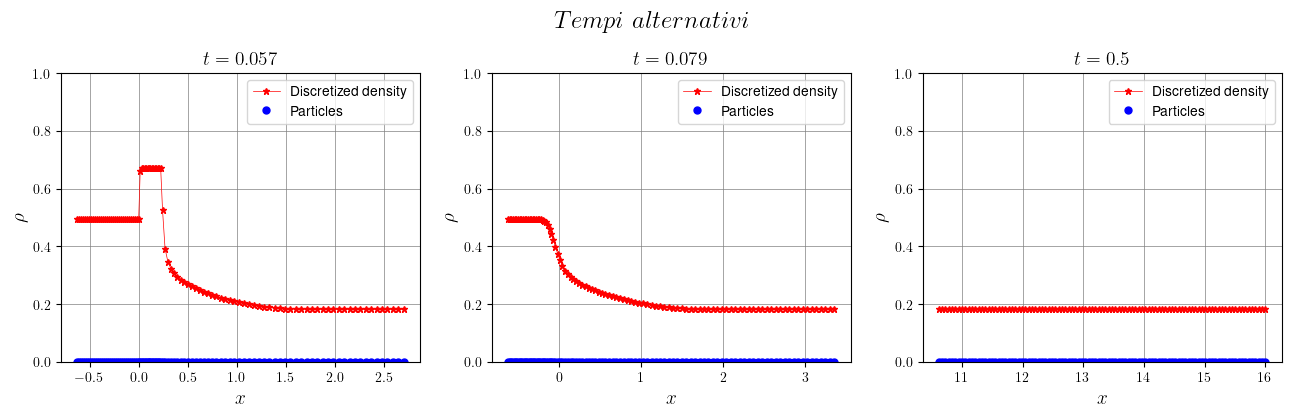

In [18]:
## Tempi alternativi
idx = 18, 25, -1

# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for ax, i in zip(axes.ravel(), idx):

    t = tspan[i]
    x = sol[:,i][1:]
    ax.plot(x,pn[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#     ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])

    # labeling     
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(r"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t.round(3)}$",fontsize=14)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()

plt.suptitle(fr"$Tempi\ alternativi$", fontsize=18, y=1.05);
plt.show()